In [1]:
import glob
import json

import pandas as pd
import re
import time

In [2]:
filepath = "./Entrepreneur d\'Intérêt Général Slack export Feb 20 2018/*/*.json"

In [3]:
data = []
for filename in glob.iglob(filepath):
    with open(filename, 'r') as f:
        js = json.load(f)
        p = re.compile("Entrepreneur d\'Intérêt Général Slack export Feb 20 2018/(.*)/.*\.json")        
        for message in js:
            message['channel'] = p.search(filename).group(1)
        data.extend(js)

with open('./Entrepreneur d\'Intérêt Général Slack export Feb 20 2018/users.json') as f:
    usr = pd.read_json(f)

In [4]:
df = pd.read_json(json.dumps(data))

In [5]:
df['time'] = df['ts'].apply(lambda ts: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(ts)))

In [6]:
cols = ['user', 'text', 'time', 'channel']
data = df[cols]

In [7]:
data.head()

,user,text,time,channel
0,U877WSZL6,<@U877WSZL6> a rejoint la chaîne,2018-02-09 11:46:57,afterwork
1,U877WSZL6,<@U877WSZL6> a défini l’objectif de la chaîne ...,2018-02-09 11:46:57,afterwork
2,U85S7B22D,<@U85S7B22D> a rejoint la chaîne,2018-02-09 11:54:56,afterwork
3,U3DDK9P6K,<@U3DDK9P6K> a rejoint la chaîne,2018-02-09 12:11:15,afterwork
4,U3DDK9P6K,enfin du pragmatisme !,2018-02-09 12:11:22,afterwork


In [8]:
usr['user'] = usr['id']
usr.head()

,color,deleted,id,is_admin,is_app_user,is_bot,is_owner,is_primary_owner,is_restricted,is_ultra_restricted,name,profile,real_name,team_id,tz,tz_label,tz_offset,updated,user
0,df3dc0,False,U7XH2E66L,True,False,False,False,False,False,False,adnene.trojette,"{'title': '', 'phone': '', 'skype': '', 'real_...",Mohammed Adnène TROJETTE,T3DCQAJS2,America/Los_Angeles,Pacific Standard Time,-28800,1518613867,U7XH2E66L
1,c386df,False,U85RBM7BL,True,False,False,False,False,False,False,adrien,"{'title': 'EIG BaliseNAV @ SHOM', 'phone': '+3...",Adrien Signorino,T3DCQAJS2,Europe/Brussels,Central European Time,3600,1518736940,U85RBM7BL
2,e475df,False,U8W3PLY5B,True,False,False,False,False,False,False,ambreelmee,"{'title': '', 'phone': '0614734409', 'skype': ...",Ambre Arnaud,T3DCQAJS2,Europe/Brussels,Central European Time,3600,1518613746,U8W3PLY5B
3,385a86,False,U85PEEN9H,True,False,False,False,False,False,False,antoine.augusti,"{'title': 'PrédiSauvetage', 'phone': '+3368709...",Antoine Augusti,T3DCQAJS2,Europe/Brussels,Central European Time,3600,1518613752,U85PEEN9H
4,43761b,False,U858Z6196,True,False,False,False,False,False,False,arnaud,"{'title': '', 'phone': '0633683161', 'skype': ...",Arnaud // tente de merger de gros CSV,T3DCQAJS2,Europe/Brussels,Central European Time,3600,1518678223,U858Z6196


In [9]:
pii_data = pd.merge(data, usr, on='user', how='left')

In [10]:
pii_data.head()

,user,text,time,channel,color,deleted,id,is_admin,is_app_user,is_bot,...,is_restricted,is_ultra_restricted,name,profile,real_name,team_id,tz,tz_label,tz_offset,updated
0,U877WSZL6,<@U877WSZL6> a rejoint la chaîne,2018-02-09 11:46:57,afterwork,a2a5dc,False,U877WSZL6,True,False,False,...,False,False,julnaour,"{'title': '', 'phone': '', 'skype': '', 'real_...",Julien Naour,T3DCQAJS2,America/Los_Angeles,Pacific Standard Time,-28800.0,1.519136e+09
1,U877WSZL6,<@U877WSZL6> a défini l’objectif de la chaîne ...,2018-02-09 11:46:57,afterwork,a2a5dc,False,U877WSZL6,True,False,False,...,False,False,julnaour,"{'title': '', 'phone': '', 'skype': '', 'real_...",Julien Naour,T3DCQAJS2,America/Los_Angeles,Pacific Standard Time,-28800.0,1.519136e+09
2,U85S7B22D,<@U85S7B22D> a rejoint la chaîne,2018-02-09 11:54:56,afterwork,827327,False,U85S7B22D,True,False,False,...,False,False,tiphaine,"{'title': 'Data Scientist / #prévisecours', 'p...",tiphaine - 2018 - prévisecours,T3DCQAJS2,Europe/Brussels,Central European Time,3600.0,1.518777e+09
3,U3DDK9P6K,<@U3DDK9P6K> a rejoint la chaîne,2018-02-09 12:11:15,afterwork,e7392d,False,U3DDK9P6K,True,False,False,...,False,False,tristram,"{'title': '', 'phone': '', 'skype': '', 'real_...",Tristram Gräbener 2017,T3DCQAJS2,Europe/Brussels,Central European Time,3600.0,1.518382e+09
4,U3DDK9P6K,enfin du pragmatisme !,2018-02-09 12:11:22,afterwork,e7392d,False,U3DDK9P6K,True,False,False,...,False,False,tristram,"{'title': '', 'phone': '', 'skype': '', 'real_...",Tristram Gräbener 2017,T3DCQAJS2,Europe/Brussels,Central European Time,3600.0,1.518382e+09


In [11]:
pii_data.to_csv('slack.csv', index=False)

In [12]:
from matplotlib import pyplot as plt

In [27]:
r = pii_data.groupby('name').size().sort_values()

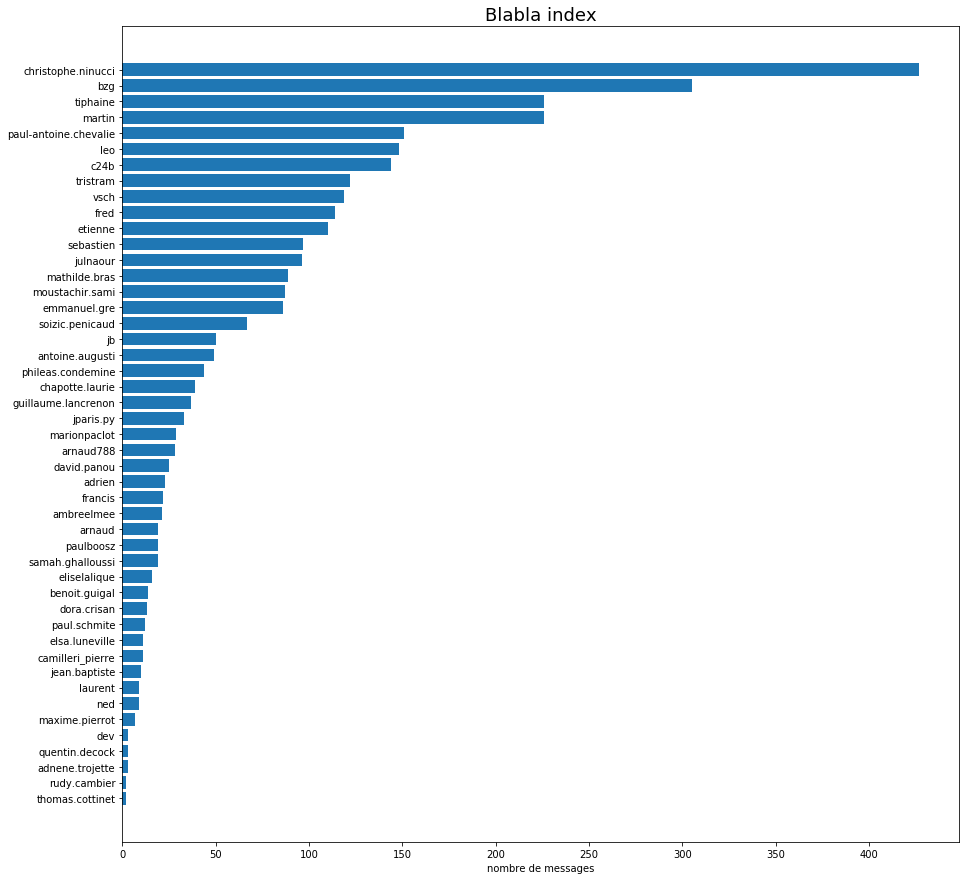

In [32]:
plt.figure(figsize=(15, 15))
plt.barh(range(len(r.values)), r.values, tick_label=r.index)
plt.title("Blabla index", size=18)
plt.xlabel("nombre de messages")
plt.show()